## Investigating performance of iNaturalist using gridded ('quadrat') image input

### Load iNaturalist model

In [ ]:
!wget "https://public.boxcloud.com/d/1/b1!iXHjGkhC2_sABlhkt_vki_JL87nnBztTlRYNEnUQjDL5y2ylPnZKDtADeRVsL1WTMZ0qScRUiuGaAhRtdPvUrQm0Yz5nvuGr6ptZc9uoRy-bJiwTkcarAetiabuP02fL1H0tjN6HFFwT5z04hKZO1iEu4KHnlCKZYpB3MwY-11qG5Ru9EzAcL11ydUx_5lzYB5Tm5-iGMtXMgkHA9TQ_O4326oVsz7PeeiUHJVw-zLAgzO-WXp8xMDsT2AJ6wDC7OuLPQjbJnv-vS-MFACHR3PJwKmjjccveX3eG-tACsHOORFECJHuHfKj-qUpjUWWZeQjDIW-BCM38oB4FU90C2yXihHtDsAmlFKItTz494WRq1C_peQFr2q0ORxEw4aYTw77VOT_HQ6G91JKunxlvuwwXHgYY1TXiaN1z39ly4qJ1IiKcnuvi1OGwnCyFjJHMdTo2ocszKry4K1M2S9JsZIT5Ex_itXtCEUCaaJwJgvh0NZbfR-yTVtlFfuFRmcPUcjekc090ruvBtpNxZ4XCu-qSYVJGoimAEJuHbgj1aagMbalWqXznVaWF0_Iek7ux8bxUrxOleHeaYs3boUfoEfuP1RHf4u_nmjsBoe4y8d01STRfwTkdsF6IQTQWprHlfmyZXTK1mOekZ8xP3DrZp_PescyVbPhyeZYXnhaRR_r6S81xGJl5bGwB8po6K81Jk3jpFqpEASJI6boj2CDxGSvUPaYzpCMrd-1N3InlfLWe3rfcFBSY7HyCYbJ8a6rMx-XazQmeYLGGaiA6GE0HHVNcz7dV3w-nrpsvdmMBJA0-yNIds1PDnZhbUMY16q4Wz2WZSwEEIhJezitZQNBPbTgE8omcf181QT5y3WudB7zEGl7w9kBTR-IzeXrkRKl78O9gXgREe_fShAwSG_Jv2VMX3Z2ZBOeE3jgKc6T7YWot2eYneK73Nl5GjZILoVwtdwVK20quMJ_boE02gutZtIK5Re6wRjKvWhjVyqLPztqB3CuDU7stwA3T_vyGnd8EJZLQWPTGFdACd3-yRF8qSMwlXOj6GHLb4-G2ikLiUNu9jm3z-GbJClML9RhLSQyKsm2YOLdjWdyg-Z-CE-shc928K3fXs4sTPlG60aCvbDPnoNXrc28Bslv8us3a-WSJzJrr6AQKjPxIGZD2WawroyEgPUDKOLNrtCZjjWz7PltOW42HdEKmFZi17ZoE2_Lg8pRtQEQ1HjW7CyLcR0GiZDn3_DRhfj_7BeS5xoaF1JMR7Z7EvWSJm_TyIVcvniSPf1Qf4o6PuD7zgvNODFgCpo8UxS2koWo./download" -O cvpr21_newt_pretrained_models.tar.gz

--2024-07-10 10:49:52--  https://public.boxcloud.com/d/1/b1!iXHjGkhC2_sABlhkt_vki_JL87nnBztTlRYNEnUQjDL5y2ylPnZKDtADeRVsL1WTMZ0qScRUiuGaAhRtdPvUrQm0Yz5nvuGr6ptZc9uoRy-bJiwTkcarAetiabuP02fL1H0tjN6HFFwT5z04hKZO1iEu4KHnlCKZYpB3MwY-11qG5Ru9EzAcL11ydUx_5lzYB5Tm5-iGMtXMgkHA9TQ_O4326oVsz7PeeiUHJVw-zLAgzO-WXp8xMDsT2AJ6wDC7OuLPQjbJnv-vS-MFACHR3PJwKmjjccveX3eG-tACsHOORFECJHuHfKj-qUpjUWWZeQjDIW-BCM38oB4FU90C2yXihHtDsAmlFKItTz494WRq1C_peQFr2q0ORxEw4aYTw77VOT_HQ6G91JKunxlvuwwXHgYY1TXiaN1z39ly4qJ1IiKcnuvi1OGwnCyFjJHMdTo2ocszKry4K1M2S9JsZIT5Ex_itXtCEUCaaJwJgvh0NZbfR-yTVtlFfuFRmcPUcjekc090ruvBtpNxZ4XCu-qSYVJGoimAEJuHbgj1aagMbalWqXznVaWF0_Iek7ux8bxUrxOleHeaYs3boUfoEfuP1RHf4u_nmjsBoe4y8d01STRfwTkdsF6IQTQWprHlfmyZXTK1mOekZ8xP3DrZp_PescyVbPhyeZYXnhaRR_r6S81xGJl5bGwB8po6K81Jk3jpFqpEASJI6boj2CDxGSvUPaYzpCMrd-1N3InlfLWe3rfcFBSY7HyCYbJ8a6rMx-XazQmeYLGGaiA6GE0HHVNcz7dV3w-nrpsvdmMBJA0-yNIds1PDnZhbUMY16q4Wz2WZSwEEIhJezitZQNBPbTgE8omcf181QT5y3WudB7zEGl7w9kBTR-IzeXrkRKl78O9gXgREe_fShAwSG_Jv2VMX3Z2ZBOeE3jgKc6T7YWot

In [ ]:
# Unzip models
!tar -xzf cvpr21_newt_pretrained_models.tar.gz

In [ ]:
# Load target model (inat2021_supervised_large)

import torch
from torchvision.models import resnet50
from torchsummary import summary

model = resnet50()
num_classes = 10000 # 10,000 classes including all species
model.fc = torch.nn.Linear(in_features=2048, out_features=num_classes)

weights_file_path = "cvpr21_newt_pretrained_models/pt/inat2021_supervised_large.pth.tar"
checkpoint = torch.load(weights_file_path, map_location=torch.device('cpu'))
model.load_state_dict(d['model'])

summary(model, input_size=(3,224,224))

NameError: name 'd' is not defined

### Load example image

In [ ]:
# Download Maxwell example image from roboflow (downloaded on 10/7/24)
!wget https://source.roboflow.com/lIFuTMYTdDcb4wAHWf9A4cSE6kn1/xdKM4CMqQm90sy0wu22G/original.jpg -O test_image.png
image_path = '/content/test_image.png'

--2024-07-10 11:03:02--  https://source.roboflow.com/lIFuTMYTdDcb4wAHWf9A4cSE6kn1/xdKM4CMqQm90sy0wu22G/original.jpg
Resolving source.roboflow.com (source.roboflow.com)... 35.190.21.63
Connecting to source.roboflow.com (source.roboflow.com)|35.190.21.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16854217 (16M) [image/jpeg]
Saving to: ‘test_image.png’

test_image.png      100%[===================>]  16.07M  47.8MB/s    in 0.3s    

2024-07-10 11:03:02 (47.8 MB/s) - ‘test_image.png’ saved [16854217/16854217]



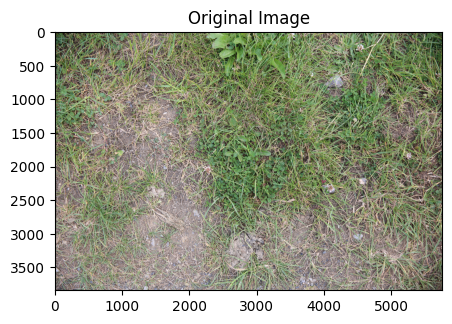

In [ ]:
# Display raw input image

from PIL import Image

image = Image.open(image_path).convert('RGB')

plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.title('Original Image')
# plt.axis('off')
plt.show()

In [ ]:
# Define function for splitting image into grids
# credit to Francesco (https://gitlab.developers.cam.ac.uk/lpb32/sensor-cdt-team-challenge-2024/-/blob/main/Model/Jupyter_Notebooks/complete_pipeline/from_image_to_map.ipynb)

from PIL import Image
import matplotlib.pyplot as plt

def fragment_image(image_path, rows, cols, overlap_ratio):
    # Load the image
    image = Image.open(image_path).convert('RGB')

    # Determine the size of each segment
    width, height = image.size
    segment_width = width // cols
    segment_height = height // rows

    # Overlap size in pixels
    overlap_width = int(segment_width * overlap_ratio)
    overlap_height = int(segment_height * overlap_ratio)

    # Create a list to hold the segments
    segments = []

    # Divide the image into overlapping segments
    for i in range(rows):
        for j in range(cols):
            # Calculate overlap by expanding the region slightly
            left = max(j * segment_width - overlap_width, 0)
            top = max(i * segment_height - overlap_height, 0)
            right = min(left + segment_width + 2 * overlap_width, width)
            bottom = min(top + segment_height + 2 * overlap_height, height)

            # Ensure we do not go out of image boundaries
            if right > width:
                right = width
            if bottom > height:
                bottom = height

            # Crop the image and save to the segments list
            segment = image.crop((left, top, right, bottom))
            segments.append(segment)

    # Plot each segment
    fig, axes = plt.subplots(rows, cols, figsize=(cols*2, rows*2))
    for ax, segment in zip(axes.flatten(), segments):
        ax.imshow(segment)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

    return segments

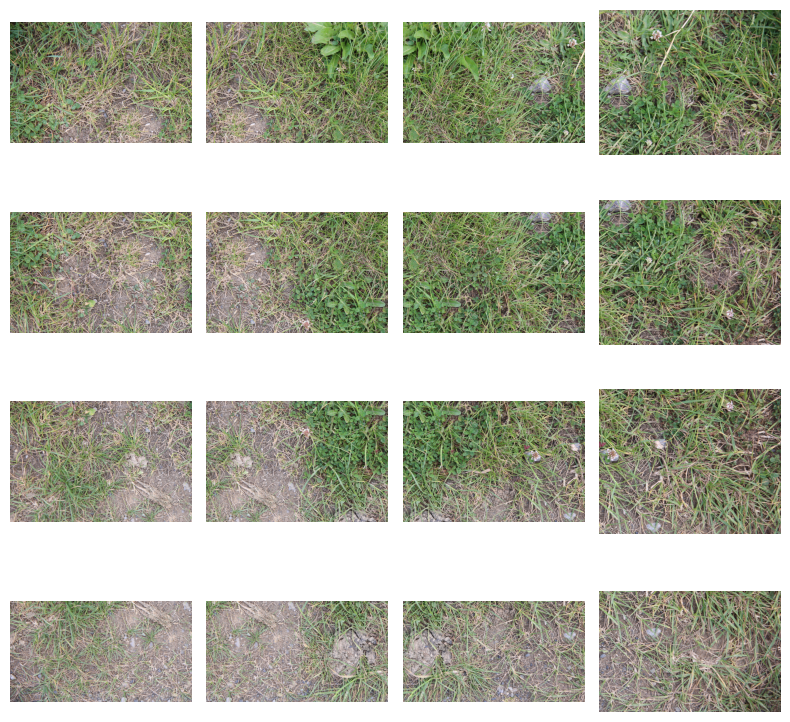

[<PIL.Image.Image image mode=RGB size=2160x1440 at 0x7A749E2A8AF0>, <PIL.Image.Image image mode=RGB size=2160x1440 at 0x7A747ECAB8B0>, <PIL.Image.Image image mode=RGB size=2160x1440 at 0x7A747EDD1450>, <PIL.Image.Image image mode=RGB size=1800x1440 at 0x7A747E8F5810>, <PIL.Image.Image image mode=RGB size=2160x1440 at 0x7A747EDD23B0>, <PIL.Image.Image image mode=RGB size=2160x1440 at 0x7A747E8F7C70>, <PIL.Image.Image image mode=RGB size=2160x1440 at 0x7A747E8F7D30>, <PIL.Image.Image image mode=RGB size=1800x1440 at 0x7A747E8F7220>, <PIL.Image.Image image mode=RGB size=2160x1440 at 0x7A747E8F7250>, <PIL.Image.Image image mode=RGB size=2160x1440 at 0x7A747E8F5840>, <PIL.Image.Image image mode=RGB size=2160x1440 at 0x7A747E8F4850>, <PIL.Image.Image image mode=RGB size=1800x1440 at 0x7A747E8F7070>, <PIL.Image.Image image mode=RGB size=2160x1200 at 0x7A747E8F6FE0>, <PIL.Image.Image image mode=RGB size=2160x1200 at 0x7A747E8F71F0>, <PIL.Image.Image image mode=RGB size=2160x1200 at 0x7A747E8F7

In [ ]:
# Split test image into grids with 0.25 overlap ratio

img_fragments = fragment_image(image_path, 4, 4, 0.25)

print(img_fragments)

In [ ]:
# define function for preparing image fragments for inference

from PIL import Image
import torch
import torchvision.transforms as transforms

def transform_image(pil_image):
  ''' returns transformed image tensor '''

  preprocess = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225]),
  ])

  return preprocess(pil_image)

In [ ]:
# function for displaying transformed image

import matplotlib.pyplot as plt
import numpy as np

def display_transform(img_tensor):

  img_tensor_np = img_tensor.numpy()
  img_tensor_np_flipped = np.transpose(img_tensor_np, (1, 2, 0))

  fig, ax = plt.subplots()

  ax.imshow(img_tensor_np_flipped)

  return plt.show()

In [ ]:
# preprocess images
img_fragment_tensors = [transform_image(fragment) for fragment in img_fragments]

In [ ]:
# Perform inference on processed images

model.eval()
per_fragment_probabilities = []
for image in img_fragment_tensors:

  with torch.no_grad():
    output = model(image.unsqueeze(0))

  image_probabilities = torch.nn.functional.softmax(output[0], dim=0)

  per_fragment_probabilities.append(image_probabilities)


### Load class labels and make streamlined class mapping

In [ ]:
# Load class IDs
!wget "https://ml-inat-competition-datasets.s3.amazonaws.com/2021/val.json.tar.gz"
!tar -xzf val.json.tar.gz

import json

with open("val.json", "r") as json_file:
  metadata_dict = json.load(json_file)

--2024-07-10 11:12:26--  https://ml-inat-competition-datasets.s3.amazonaws.com/2021/val.json.tar.gz
Resolving ml-inat-competition-datasets.s3.amazonaws.com (ml-inat-competition-datasets.s3.amazonaws.com)... 52.219.179.20, 52.219.94.12, 52.219.110.132, ...
Connecting to ml-inat-competition-datasets.s3.amazonaws.com (ml-inat-competition-datasets.s3.amazonaws.com)|52.219.179.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9797665 (9.3M) [application/gzip]
Saving to: ‘val.json.tar.gz’

val.json.tar.gz     100%[===================>]   9.34M  49.1MB/s    in 0.2s    

2024-07-10 11:12:27 (49.1 MB/s) - ‘val.json.tar.gz’ saved [9797665/9797665]



In [ ]:
# make plant genus/family mapping dicts

id_family_mapping = {
    int(item['id']): item['family'] if item['kingdom'] == 'Plantae' else 'non_plant'
    for item in metadata_dict['categories']
}

id_genus_mapping = {
    int(item['id']): item['genus'] if item['kingdom'] == 'Plantae' else 'non_plant'
    for item in metadata_dict['categories']
}

### Report model predictions

In [ ]:
# function for merging probabilities into family classes

def merge_probabilities(probability_tensor, class_mapping_dict):

    class_probabilities = {}

    for class_id, class_label in class_mapping_dict.items():

        prob = probability_tensor[class_id].item()

        if class_label in class_probabilities:
            class_probabilities[class_label] += prob
        else:
            class_probabilities[class_label] = prob

        sorted_probabilities = sorted(class_probabilities.items(), key=lambda x: x[1], reverse=True)

    return sorted_probabilities


In [ ]:
# display model output for each image fragment

image_probability_tuples = list(zip(img_fragment_tensors, per_fragment_probabilities))

for tensor, probabilities in image_probability_tuples:

  print("Processed image:")
  display_transform(tensor)

  sorted_family_probabilities = merge_probabilities(probabilities, id_family_mapping)
  sorted_genus_probabilities = merge_probabilities(probabilities, id_genus_mapping)
  print("Top 10 plant family probabilities:")
  for prediction in sorted_family_probabilities[:10]:
    print(prediction)
  print()
  print("Top 10 plant genus probabilities:")
  for prediction in sorted_genus_probabilities[:10]:
    print(prediction)

  print()

Output hidden; open in https://colab.research.google.com to view.

Processed image:


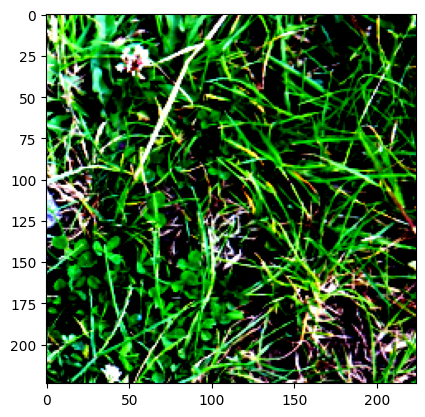

Top 10 plant family probabilities:
('Brassicaceae', 0.6919719190231106)
('Fabaceae', 0.12495738876549733)
('Amaryllidaceae', 0.03627360887450948)
('Verbenaceae', 0.026154402523559384)
('Asteraceae', 0.019956961840458254)
('non_plant', 0.011413011743340307)
('Apiaceae', 0.009461643386543983)
('Plumbaginaceae', 0.007042254181669705)
('Ranunculaceae', 0.006787551517298596)
('Cleomaceae', 0.005789917495107488)

Top 10 plant genus probabilities:
('Cardamine', 0.6067572418911595)
('Trifolium', 0.11628319358680983)
('Capsella', 0.051827285438776016)
('Allium', 0.033059671382147826)
('Phyla', 0.02401882097910857)
('Nasturtium', 0.02343558706343174)
('non_plant', 0.011413011743340307)
('Armeria', 0.006073695607483387)
('Antennaria', 0.006054427823983133)
('Petasites', 0.005783866762612888)


In [ ]:
# Output for fragment #4

tensor, probabilities = image_probability_tuples[3]

print("Processed image:")
display_transform(tensor)

sorted_family_probabilities = merge_probabilities(probabilities, id_family_mapping)
sorted_genus_probabilities = merge_probabilities(probabilities, id_genus_mapping)
print("Top 10 plant family probabilities:")
for prediction in sorted_family_probabilities[:10]:
  print(prediction)
print()
print("Top 10 plant genus probabilities:")
for prediction in sorted_genus_probabilities[:10]:
  print(prediction)

iNaturalist incorrectly predicts fragment #4 dominated by Brassicaceae (cabbage family) but assigns Fabaceae (family to which Trifolium/clover belongs) with second highest probability to be fair.

### Species info

Grass species (Poaceae family):

- Lolium perenne (ryegrass)
- Agrostis stolonifera (bent grass)
- Holcus lanatus (fog grass)
- Alopecurus geniculatus (foxtail)
- Phleum pratense (timothy grass)

Clover species (Fabaceae family):

- Trifolium pratense
- Trifolium repens
- Trifolium hybridum

Other species:

- Ranunculus repens (buttercup)
- Rumex obtusifolius (dock leaf)
- Taraxacum officinale (dandelion)
- Plantago lanceolata (ribwort plantain)